#### Apprentissage par Machines à Vecteurs de Support

In [35]:
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score
from sklearn.svm import SVC
import time 
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt

#database
mnist = fetch_openml('mnist_784')


In [36]:
#Echantillon
sample = np.random.randint(70000, size=7000)
data = mnist.data[sample]
target = mnist.target[sample]

#Split for train/test
xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=0.7)


#### Construire un modèle de classification ayant comme paramètres un noyau linear

In [37]:
xClassifier=[]
yPresision=[]
yTime=[]

#Noyau linear
classifier_ln = SVC(kernel='linear')   
start_ln=time.time()
classifier_ln.fit(xtrain, ytrain)
delay_ln=time.time()-start_ln
precision_score_ln = precision_score(ytest, classifier_ln.predict(xtest),average='micro')
print("precision score linear = "+str(precision_score_ln*100))

xClassifier.append('Linear')
yPresision.append(precision_score_ln*100)
yTime.append(delay_ln)

precision score linear = 90.85714285714286


#### Tentez d’améliorer les résultats en variant la fonction noyau : ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’

In [38]:
#Noyau poly
from sklearn.metrics import precision_score
classifier_poly = SVC(kernel='poly', gamma='auto')  
start_poly=time.time()
classifier_poly.fit(xtrain, ytrain) 
delay_poly=time.time()-start_poly
precision_score_poly = precision_score(ytest, classifier_poly.predict(xtest),average='micro')
print("precision score poly = "+str(precision_score_poly*100))

xClassifier.append('Poly')
yPresision.append(precision_score_poly*100)
yTime.append(delay_poly)

#Noyau rbf
classifier_rbf = SVC(kernel='rbf', gamma='auto')     
start_rbf=time.time()
classifier_rbf.fit(xtrain, ytrain) 
delay_rbf=time.time()-start_rbf
precision_score_rbf = precision_score(ytest, classifier_rbf.predict(xtest),average='micro')
print("precision score rbf = "+str(precision_score_rbf*100))

xClassifier.append('rbf')
yPresision.append(precision_score_rbf*100)
yTime.append(delay_rbf)

#Noyau sigmoid
classifier_sig = SVC(kernel='sigmoid', gamma='auto')     
start_sig=time.time()
classifier_sig.fit(xtrain, ytrain) 
delay_sig=time.time()-start_sig
precision_score_sig = precision_score(ytest, classifier_sig.predict(xtest),average='micro')
print("precision score sigmoid = "+str(precision_score_sig*100))

xClassifier.append('sig')
yPresision.append(precision_score_sig*100)
yTime.append(delay_sig)

precision score poly = 94.80952380952381
precision score rbf = 16.952380952380953
precision score sigmoid = 11.285714285714285


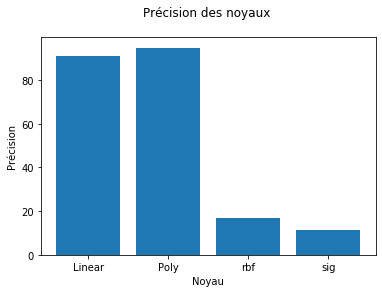

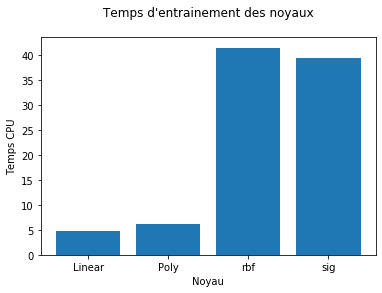

In [39]:
#Plot Precision
plt.bar(xClassifier,yPresision)
plt.title('Précision des noyaux \n')
plt.xlabel('Noyau')
plt.ylabel('Précision')
plt.show()

#Plot Time
plt.bar(xClassifier,yTime)
plt.title('Temps d\'entrainement des noyaux\n')
plt.xlabel('Noyau')
plt.ylabel('Temps CPU')
plt.show()

#### Faites varier le paramètre de tolérance aux erreurs C 

In [40]:
# à chaque utilisation de precision_score 2 fois de suite il nous affiche une erreur incorrigible c'est pour cela qu'on import à chaque itération

for i in range(2,11,2) :    
    classifier = SVC(C=(i/10),kernel='poly', gamma='auto')   #Classifier poly
    classifier.fit(xtrain, ytrain) 
    #clock
    from sklearn.metrics import precision_score
    #precision
    #precision_score = precision_score(ytest, classifier.predict(xtest),average='micro')
    precision_score = classifier.score(xtest,ytest)
    print("precision score for c = "+str(i/10)+" = "+str(precision_score*100))

precision score for c = 0.2 = 94.80952380952381
precision score for c = 0.4 = 94.80952380952381
precision score for c = 0.6 = 94.80952380952381
precision score for c = 0.8 = 94.80952380952381
precision score for c = 1.0 = 94.80952380952381


#### Tracez la courbe d’erreur de classification sur les données d’entrainement et de test en fonction de C
En variant la tolérance aux erreurs C, on obtient toujours les mêmes résultats. Ainsi l'erreur de classification sur les données est la même

#### Construisez la matrice de confusion en utilisant le package metrics

In [44]:
cm_ln = confusion_matrix(ytest, classifier_ln.predict(xtest)) 
print('CM linéaire : \n')
print(cm_ln)
print('\n')

cm_poly = confusion_matrix(ytest, classifier_poly.predict(xtest)) 
print('CM poly : \n')
print(cm_poly)
print('\n')

cm_rbf = confusion_matrix(ytest, classifier_rbf.predict(xtest)) 
print('CM rbf : \n')
print(cm_rbf)
print('\n')

cm_sig = confusion_matrix(ytest, classifier_sig.predict(xtest)) 
print('CM sig : \n')
print(cm_sig)
print('\n')

CM linéaire : 

[[196   0   0   0   0   2   0   1   1   0]
 [  0 233   1   2   0   0   0   0   1   0]
 [  2   4 187   1   3   1   2   1   1   0]
 [  1   1   6 190   0   9   0   2   4   2]
 [  1   2   3   0 179   0   2   2   0   9]
 [  4   4   2  10   0 156   2   0   2   0]
 [  1   1   6   0   1   2 196   0   1   0]
 [  0   3   3   2   1   0   0 228   0  10]
 [  3   9   4   7   1  11   4   0 168   5]
 [  0   2   2   3  10   1   0   6   2 175]]


CM poly : 

[[195   1   0   0   0   1   1   1   1   0]
 [  0 232   1   1   1   0   0   0   0   2]
 [  2   1 195   3   0   0   1   0   0   0]
 [  2   1   4 200   1   3   0   1   3   0]
 [  0   1   1   0 186   1   1   0   0   8]
 [  2   5   1   2   0 169   1   0   0   0]
 [  0   0   0   0   0   1 205   0   2   0]
 [  0   4   2   1   0   0   0 234   0   6]
 [  1   3   1   4   1   2   2   0 194   4]
 [  0   3   1   2   4   1   0   8   1 181]]


CM rbf : 

[[  8 192   0   0   0   0   0   0   0   0]
 [  0 237   0   0   0   0   0   0   0   0]
 [  0 186

####  A votre avis, quels sont les avantages et les inconvénients du SVM ?
#### Avantages :
- Il existe plusieurs fonctions de noyaux qui peuvent améliorer les résultats. Cela dépend du nombre des classes dans le jeu de données et de sa taille.
- Le noyau linéaire donne un résultat rapide avec une bonne performance.
- Nécessite moins de jeu de données que le réseau de neurones 

#### Inconvénients : 
- Les noyaux rbf et sigmoid ont de faibles performances (du moins dans notre cas)
- Ces deux noyaux nécessitent beaucoup de temps de calcul
- Nécessite plus de jeu de données que kNN

#### A votre avis, quel est le meilleur classifieur et quels sont ses hyperparamètres finaux ? 
Selon les cas, un algorithme peut être meilleur qu’un autre. 

En effet, les réseaux de neurones sont plus performants que d’autres méthodes si, il existe vraiment beaucoup de données et leur structure est complexe. En particulier, si vous souhaitez résoudre un problème de classification, vous avez besoin de nombreux exemples par classe.

En revanche, le classifieur kNN n'a pas besoin de beaucoup d'exemples par classe. Donc, si vous avez un problème de classification avec quelques exemples d’entraînement par classe, kNN aurait probablement une meilleure performance que d’autres méthodes. 

Pour obtenir une bonne performance, SVM nécessite beaucoup plus de données d’entraînement que kNN, mais moins que le réseaux de neurones. SVM linéaire peut être entraîné plus rapidement, mais il est moins précis que les approches non linéaires. Son temps d’entraînement est également plus long que celui du cas linéaire.

Cela dit, les algorithmes d'entraînement pour SVM ont de meilleures garanties. Les réseaux de neurones sont plus difficiles et nécessitent parfois un peu d’entretien.